In [239]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from keras.models import load_model

In [240]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [241]:
X_test.shape

(10000, 28, 28)

In [159]:
X_train.shape

(60000, 28, 28)

In [23]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

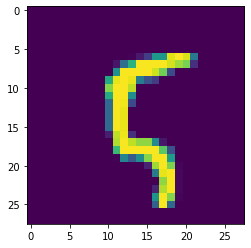

In [158]:
import matplotlib.pyplot as plt
plt.imshow(X_train[100])

In [25]:
X_train = X_train/255
X_test = X_test/255

In [26]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [209]:
def plot_input_img(i):
    plt.imshow(X_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.axis('off')
    plt.show()

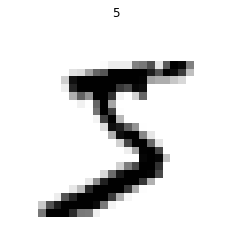

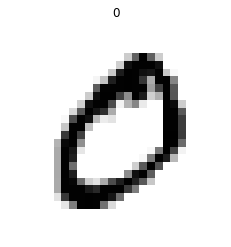

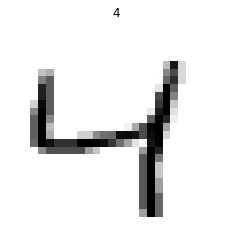

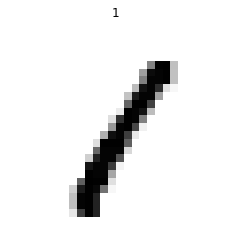

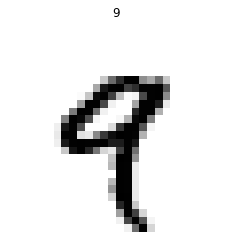

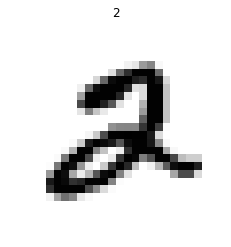

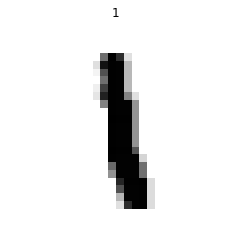

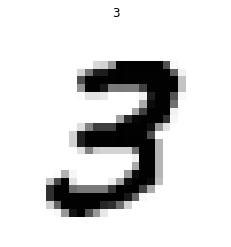

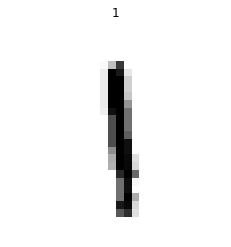

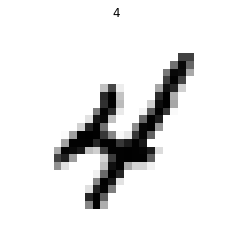

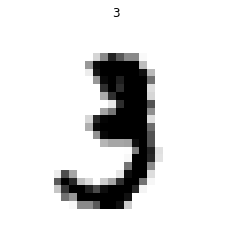

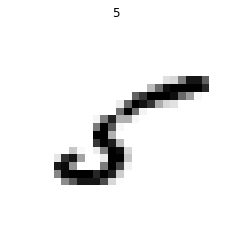

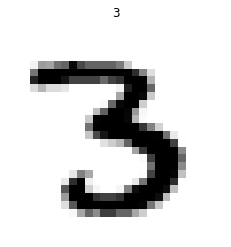

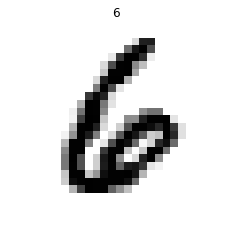

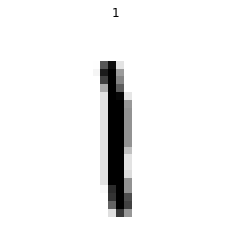

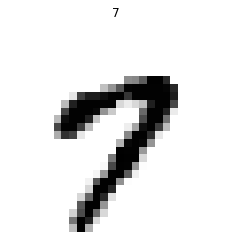

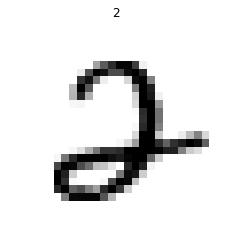

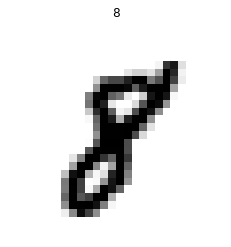

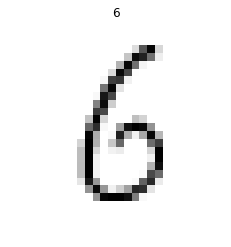

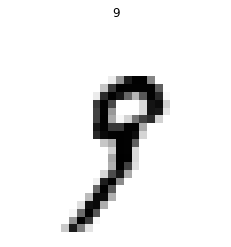

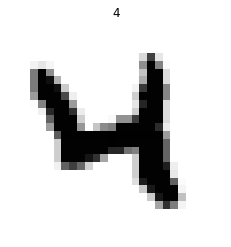

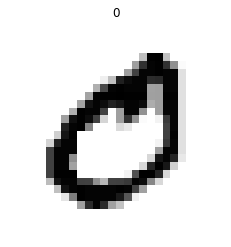

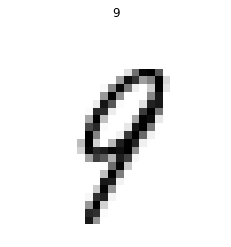

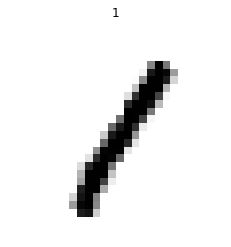

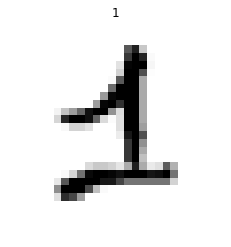

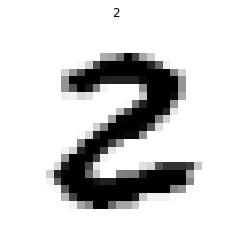

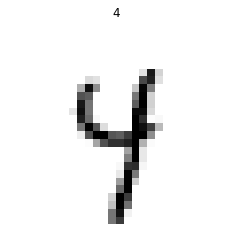

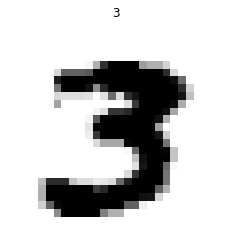

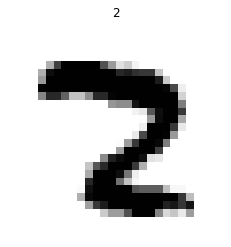

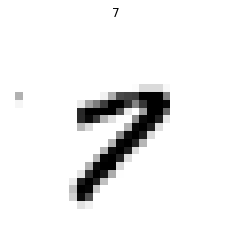

In [210]:
for i in range(30):
    plot_input_img(i)

In [27]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [29]:
from tensorflow.keras.callbacks import  ModelCheckpoint
mc = ModelCheckpoint("./bestmodel2.h5", monitor="val_accuracy", verbose=1, save_best_only=True)
cb=[mc]

In [30]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=50,validation_split=0.2,callbacks=cb)

In [124]:
y_prob = model.predict(X_test)


In [125]:
y_pred = y_prob.argmax(axis=1)

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9778

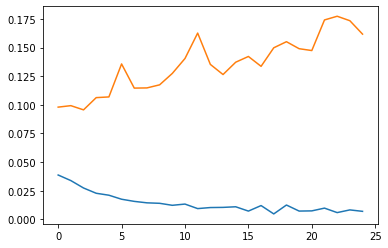

In [127]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

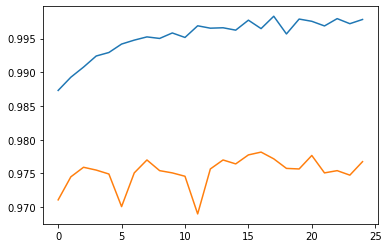

In [128]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

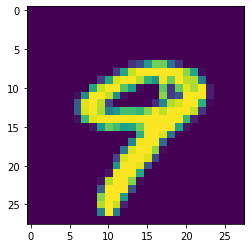

In [195]:
plt.imshow(X_test[9])

In [ ]:
model.predict(X_test[7].reshape(1,28,28)).argmax(axis=1)

Predicted Digit: 7


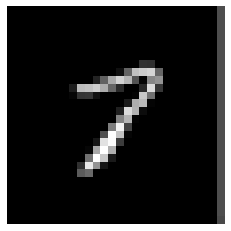

In [249]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import load_model
# Load the trained model
model = tf.keras.models.load_model('bestmodel2.h5')

# Load and preprocess the handwritten image
image_path = './Extra_Data/72.PNG'
image = Image.open(image_path).convert('L') # Convert to grayscale
image = image.resize((28, 28))  # Resize to MNIST size
image = np.array(image) / 255.0  # Normalize pixel values

# Reshape the image to match the model's input shape
image = np.reshape(image, (1, 28, 28))
Model=load_model('bestmodel2.h5')
# Make predictions
predictions = Model.predict(image)
predicted_digit = np.argmax(predictions)

print('Predicted Digit:', predicted_digit)

# Plot the image
plt.imshow(image[0], cmap='gray')
plt.axis('off')
plt.show()


In [250]:
import pygame, sys
from pygame.locals import *
from pygame.locals import QUIT, MOUSEMOTION, MOUSEBUTTONDOWN, MOUSEBUTTONUP, KEYDOWN
import numpy as np
from keras.models import load_model
import cv2

In [251]:
WINDOWSIZEX = 640
WINDOWSIZEY = 440

BOUNDRYINC= 5

WHITE = (255,255,255)
BLACK = (0,0,0)
RED= (255,0,0)
IMAZESAVE = False



In [252]:

LABELS = {0:"zero", 1: "one", 2: "two", 3: "three", 4: "four", 5: "five", 6: "six", 7: "seven", 8: "eight", 9: "nine"}


In [ ]:
# In[ ]:

# Initialize pygame
pygame.init()
FONT = pygame.font.Font(None, 24) 
# FONT = pygame.font.Font("freesensebold.ttf", 18)
DISPLAYSURF = pygame.display.set_mode((WINDOWSIZEX, WINDOWSIZEY))

pygame.display.set_caption("digit board") 
iswriting  = False
number_xcord = []
number_ycord = []

image_cnt = 1
PREDICT = True

while True:
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            sys.exit()
            
        if event.type == MOUSEMOTION and iswriting:
            xcord, ycord = event.pos
            pygame.draw.circle(DISPLAYSURF, WHITE, (xcord, ycord), 4,0 )
            
            number_xcord.append(xcord)
            number_ycord.append(ycord)
        
        if event.type == MOUSEBUTTONDOWN:
            iswriting = True

        if event.type == MOUSEBUTTONUP:
            iswriting = False
            number_xcord = sorted(number_xcord)
            number_ycord = sorted(number_ycord)

            rect_min_x,  rect_max_x= max(number_xcord[0]-BOUNDRYINC, 0),min(WINDOWSIZEX, number_xcord[-1]+BOUNDRYINC)
            rect_min_Y,  rect_max_Y= max(number_ycord[0]-BOUNDRYINC ,0),min(number_ycord[-1]+BOUNDRYINC, WINDOWSIZEX)

            number_xcord = []
            number_ycord = []
            
            pygame.draw.rect(DISPLAYSURF, RED, (rect_min_x, rect_min_Y, rect_max_x - rect_min_x, rect_max_Y - rect_min_Y), 2)
                
            img_arr = np.array(pygame.PixelArray(DISPLAYSURF))[rect_min_x: rect_max_x, rect_min_Y: rect_max_Y].T.astype(np.float32)
                
            if IMAZESAVE:
                cv2.imwrite("image.png")
                image_cnt +=1
                    
            if PREDICT:
                image = cv2.resize(img_arr, (28,28))
                image = np.pad(image, (10,10), 'constant', constant_values = 0)
                image = cv2.resize(image, (28,28))/255
                    
                label = str(LABELS[np.argmax(MODEL.predict(image.reshape(1,28,28,1)))])
                    
                textSurface = FONT.render(label, True, RED, WHITE)
                textRecObj = textSurface.get_rect()
                textRecObj.left, textRecObj.bottom = rect_min_x, rect_max_Y 
                    
                
                DISPLAYSURF.blit(textSurface, textRecObj)
               
        if event.type == KEYDOWN:
            if event.unicode == "n":
                DISPLAYSURF.fill(BLACK)
    pygame.display.update()                


ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4732:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4732:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4732:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5220:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM default


In [ ]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
